**Project Description**

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is **customer churn**. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But **if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry**: your follower might have gotten bored and left you.

For a gym, **it makes sense to say a customer has left if they don't come for a month**. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has **digitized a number of its customer profiles**. Our **task is to analyze them and come up with a customer retention strategy**.

**We will:**

- Learn to **predict the probability of churn** (for the upcoming month) for each customer <br>
- Draw up **typical user portraits**: select the most **outstanding groups** and describe their main features <br>
- Analyze the **factors** that impact churn most <br>
- Draw basic conclusions and develop **recommendations** on how to improve customer service: <br>
Identify target groups <br>
Suggest measures to cut churn <br>
Describe any other patterns you see with respect to interaction with customers <br>

**Instructions for completing the project:** <a id='contents'></a>

Build a binary classification model for customers where the target feature is the user's leaving next month.

Remember to indicate the random_state parameter when dividing data and defining the algorithm.

For K-means: (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

[**Step 1**: Download the data](#download)<br>
[**Step 2**: Carry out exploratory data analysis:](#eda)<br>
[- Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).](#describe)<br>
[- Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).](#groupby)<br>
[- Plot bar histograms and feature distributions for those who left (churn) and those who stayed.](#plot)<br>
[- Build a correlation matrix and display it.](#displaycorr)<br>
[**Step 3**. Build a model to predict user churn:](#model)<br>
[- Divide the data into train and validation sets using the train_test_split() function.](#divide)<br>
[- Train the model on the train set with two methods: logistic regression and random forest.](#train)<br>
[- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?](#evaluate)<br>
[**Step 4**. Create user clusters:](#clasters)<br>
[- Set aside the column with data on churn and identify object (user) clusters.](#setaside)<br>
[- Standardize the data.](#standardize)<br>
[- Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.](#dendrogram)<br>
[- Train the clustering model with the K-means algorithm and predict customer clusters.](#kmeans)<br>
[- Look at the mean feature values for clusters. Does anything catch your eye?](#mfv)<br>
[- Plot distributions of features for the clusters. Do you notice anything?](#distributions)<br>
[- Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?](#churnrate)<br>
[**Step 5**. Come up with conclusions and basic recommendations on working with customers.](#conclusions)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Step 1**: Download the data <a id='download'></a>

In [2]:
try:
    data = pd.read_csv('gym_churn_us.csv')
except:
    data = pd.read_csv('/datasets/gym_churn_us.csv')

data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


- **'Churn'** — the fact of churn for the month in question<br>
- **'Near_Location'** — whether the user lives or works in the neighborhood where the gym is located<br>
- **'Partner'** — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)<br>
- **Promo_friends** — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)<br>
- **'Phone'** — whether the user provided their phone number<br>
- **'Lifetime'** — the time (in months) since the customer first came to the gym<br>
- **'Contract_period'** — 1 month, 3 months, 6 months, or 1 year<br>
- **'Month_to_end_contract'** — the months remaining until the contract expires<br>
- **'Group_visits'** — whether the user takes part in group sessions<br>
- **'Avg_class_frequency_total'** — average frequency of visits **per week** over the customer's lifetime<br>
- **'Avg_class_frequency_current_month'** — average frequency of visits per week over the preceding month<br>
- **'Avg_additional_charges_total'** — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

[**Back to list of instructions** ](#contents)

**Step 2**: Carry out exploratory data analysis <a id='eda'></a>

**Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).**<a id='describe'></a>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
data.sample()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1715,0,1,0,0,1,6,1,28,145.586247,6.0,3,3.541247,3.526442,0


In [5]:
data.describe(include='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
data.shape

(4000, 14)

In [8]:
for i in data.columns:
    print(i, len(data[data[i]==0]))

gender 1959
Near_Location 619
Partner 2053
Promo_friends 2766
Phone 386
Contract_period 0
Group_visits 2351
Age 0
Avg_additional_charges_total 0
Month_to_end_contract 0
Lifetime 487
Avg_class_frequency_total 88
Avg_class_frequency_current_month 181
Churn 2939


In [9]:
data.columns = data.columns.str.lower()

**Conclusion:** The data contains 4000 rows and 14 columns. It does not have any missing features.<br>
For 'near_location' column mean is 0.84 and std is 0.36. <br>
For 'promo_friends' column mean is 0.3 and std is 0.46.<br>
For 'phone' mean is 0.9 and std is 0.29. <br>
For 'contract_period' mean is 4.68 months and std is 4.5 <br>
Mean and median age is 29, std is 3 years. <br>
Mean for 'additional_charges' is around 147, std is 96.<br>
Mean for 'month_to_end_contract' is 4.3 months, std is around 4.2. <br>
Mean for 'lifetime' is 3.7 months, std is 3.7. <br>
Mean for 'avg_class_frequency_total' is 1.8, std is 0.9. <br>
Mean for 'avg_class_frequency_current_month' 1.76 and std is 1.05. <br>
Mean for 'churn' is 0.26 and std is 0.44.<br>
We have changed columns' names to lowercase for convenience. 

[**Back to list of instructions** ](#contents)

**Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).** <a id='groupby'></a>

In [10]:
print('The number of those who left is:', data.query('churn in "1"').shape[0])

The number of those who left is: 1061


In [11]:
print('The number of those who stayed is:', data.query('churn in "0"').shape[0])

The number of those who stayed is: 2939


In [12]:
churn_mean_values = data.groupby(['churn']).mean()
churn_mean_values.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Conclusion:** Those who left live slightly further away from the location. They are less likely to be an employee of a partner company. They are less likely to have signed up through a promo code from a friend. They have equal likelihood of having provided their phone number. Their contract period is on average around 3 times shorter than for those who stayed. Those who left are much less likely to participate in group sessions. Those who left are slightly younger than those who stayed. They had way less time left till the end of their contract as opposed to those who stayed. They visited once a week on average as opposed to two times a week on average for those who stayed.

**Plot bar histograms and feature distributions for those who left (churn) and those who stayed.** <a id='plot'></a>

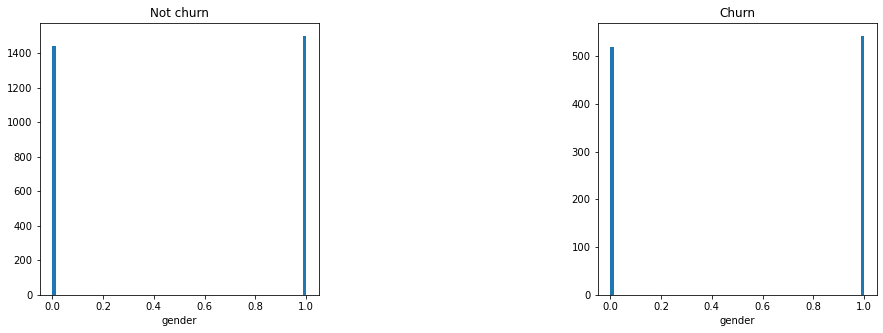

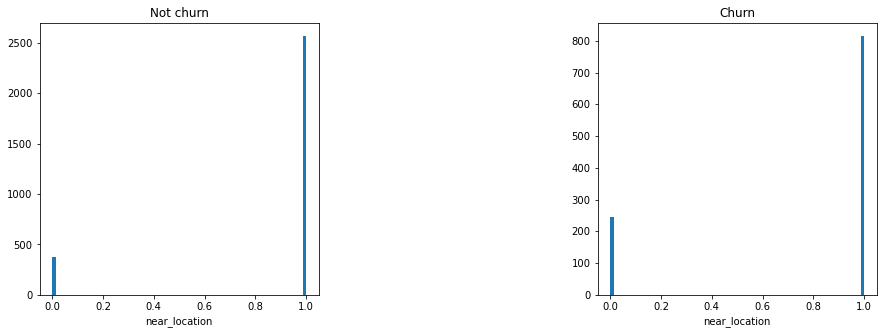

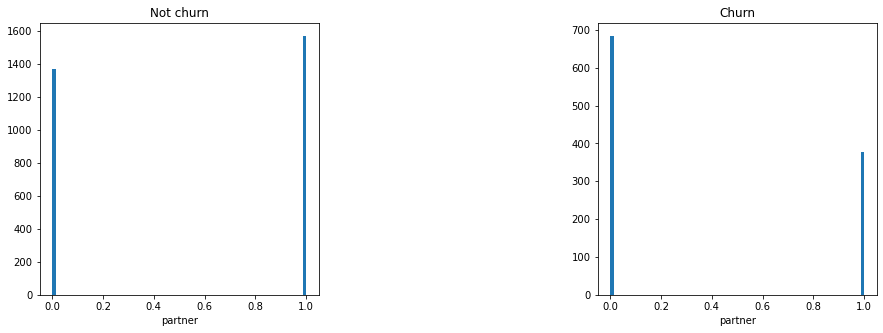

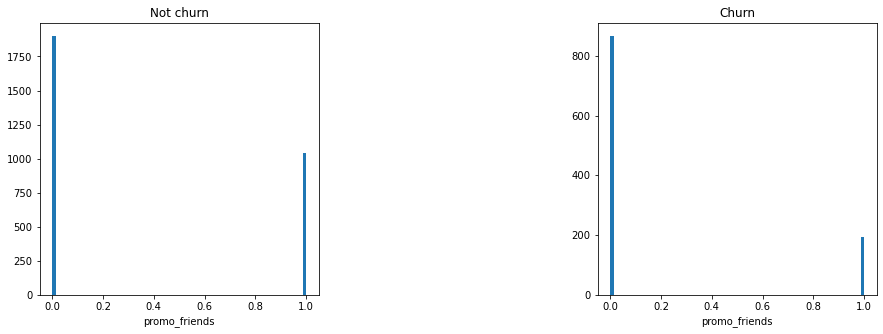

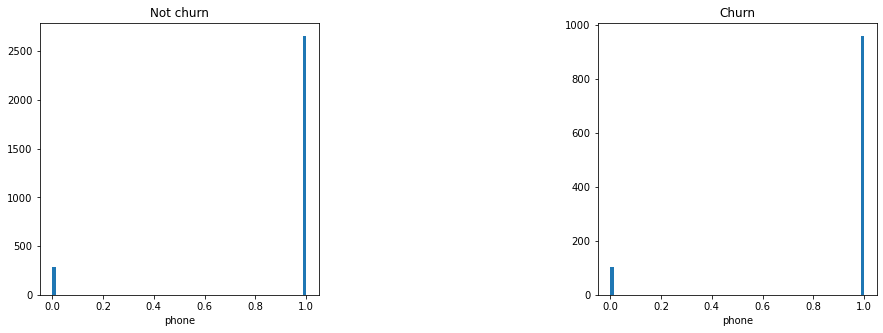

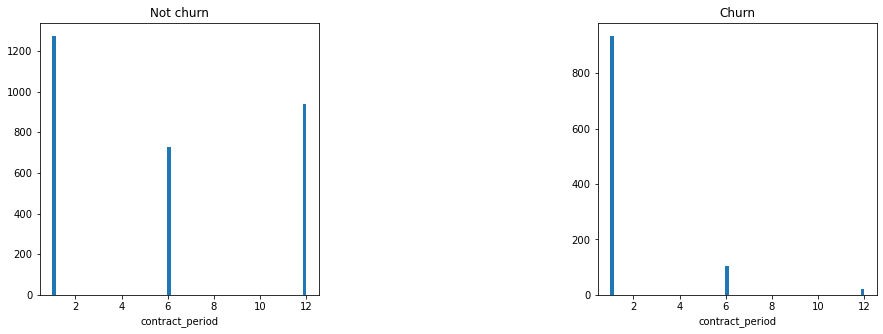

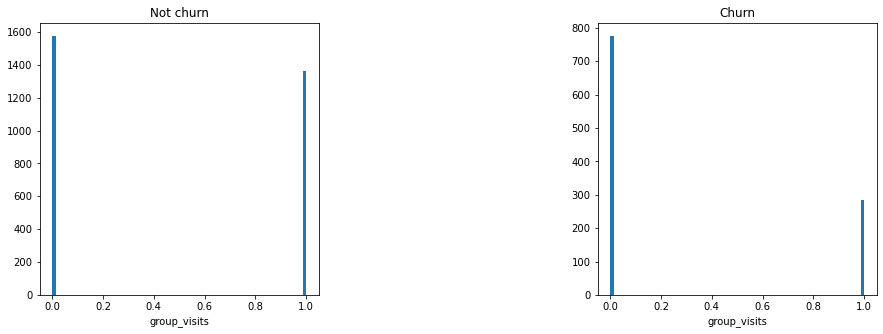

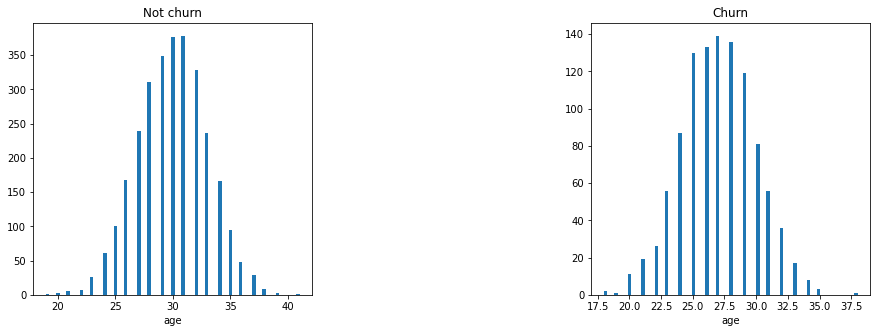

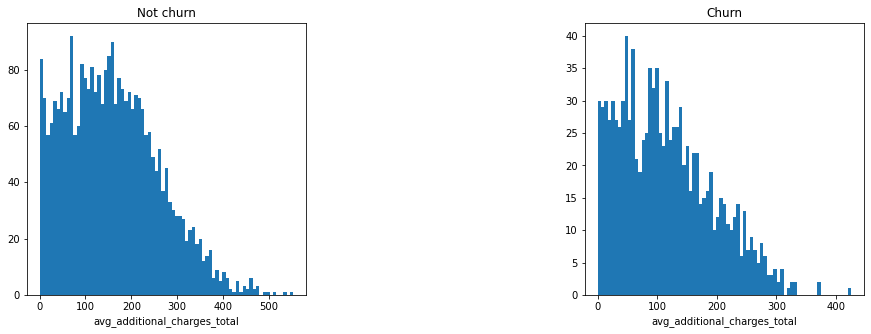

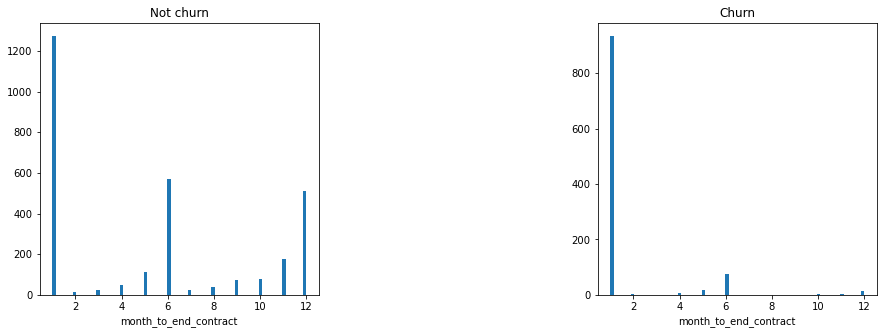

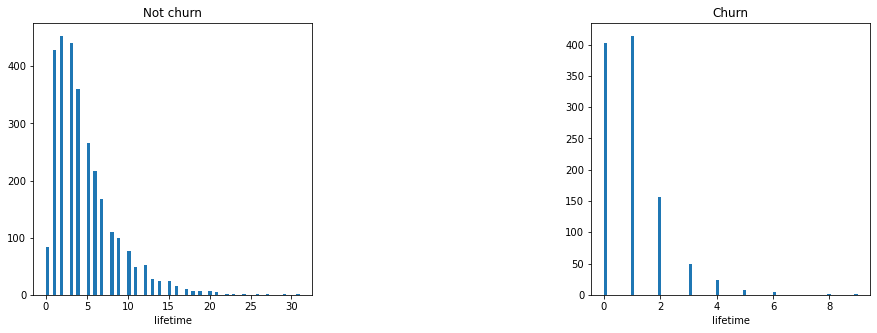

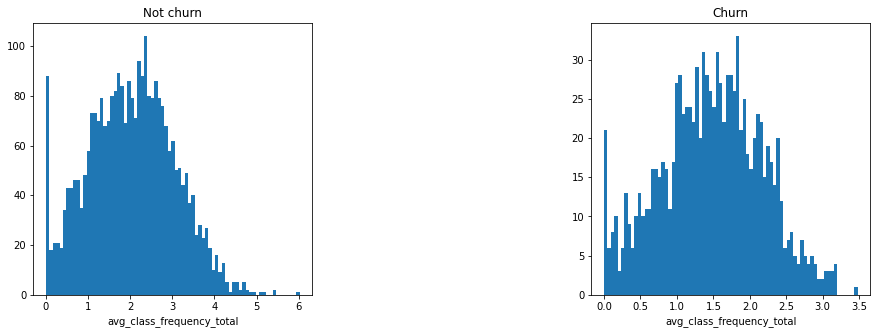

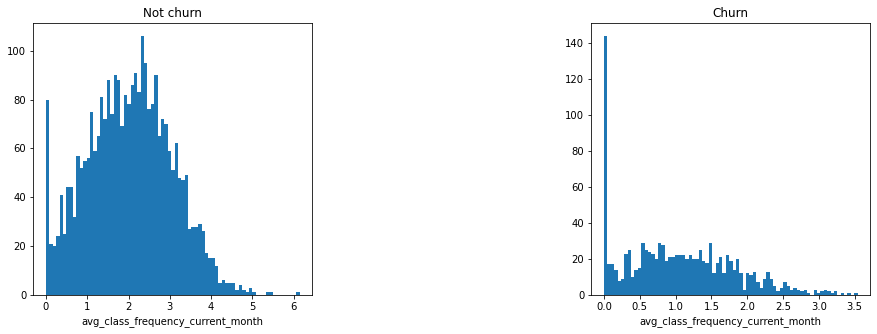

In [13]:
column_name = churn_mean_values.columns.to_list()
for name in column_name:
    fig, (axs1,axs2) = plt.subplots(1, 2, figsize=(15,5))
# adjusting space between subplots 
    fig.subplots_adjust(hspace=1,wspace=1) 
    axs1.hist(data.query('churn in "0"')[name], bins=75)
    axs1.set_title('Not churn')
    axs1.set_xlabel(name)
    
    axs2.hist(data.query('churn in "1"')[name],bins=75)
    axs2.set_title('Churn')          
    axs2.set_xlabel(name)
    
    #fig.show()
    plt.show()

**Conclusion:** The distribution for gender and locations looks similar for both groups. Those who left are slightly less likely to be from a partner organisation. For those who stayed the distribution of contract period left is more balanced with a lot of people having 6 or 12 months left. Those who churned were more likely to have less than 2 months of contract left. The age is distributed normally for both groups. The histogram on additional charges looks similar for both groups. Those who left have been a member on average for a smaller period of time than those who stayed. Average class attendance frequency seems compatible for both groups in total, but average class frequency for the current month is much lower for those tho eventually left. 

**Build a correlation matrix and display it.** <a id='displaycorr'></a>

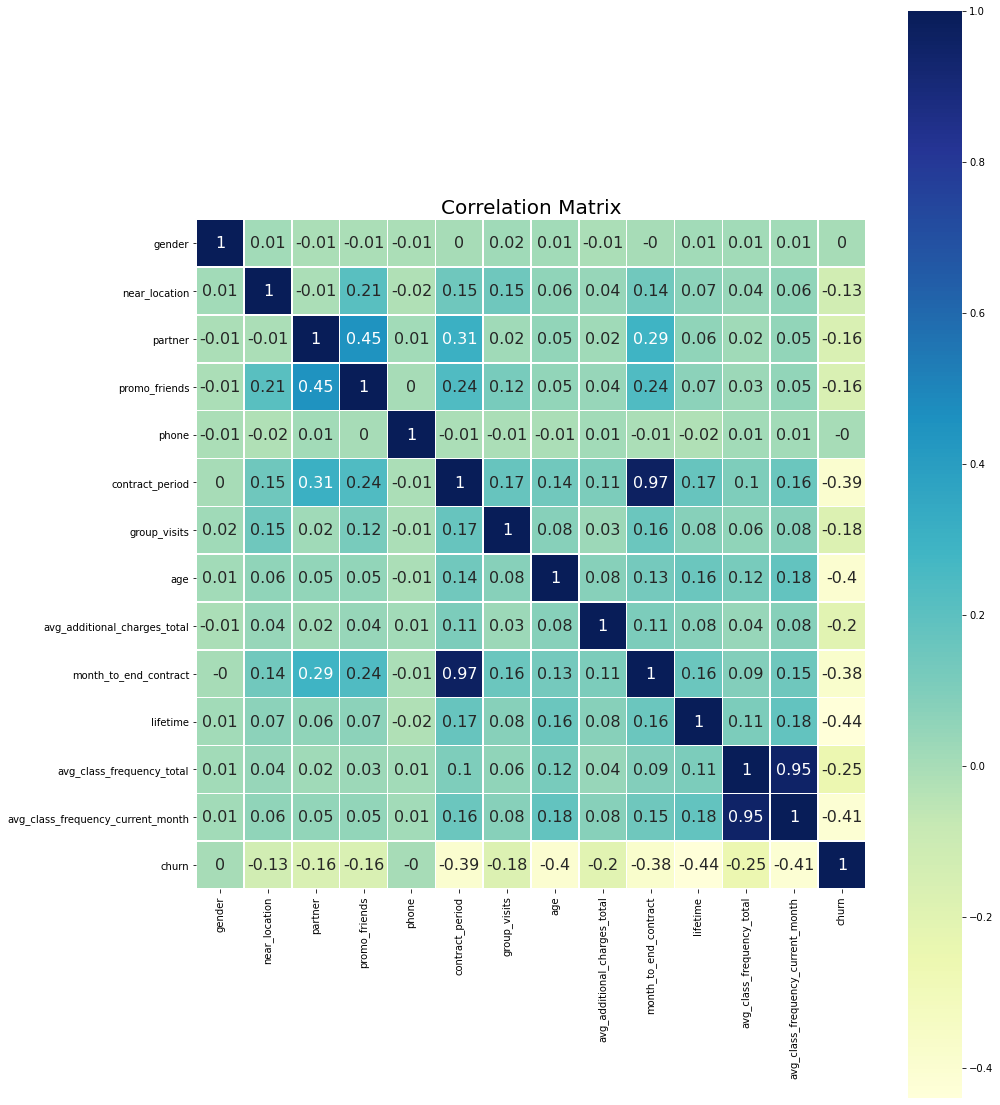

In [14]:
cm = data.corr().round(2)
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(cm, annot=True, square=True, linewidths=.5, annot_kws={"size":16}, cmap="YlGnBu")
#sns.set(font_scale=6)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

**Conclusion:** The features that have the strongest correlation with the target variable: contract period, age, month to end contract, lifetime, average class frequency current month. <br>
The features that strongly correlate with each other: avg class frequency total and avg class frequency current month, contract period and month to end contract have correlation higher than 0.8.

**Overall conclusion for Step 2:** Features that can be the most valuable for the model: contract period, age, average class frequency current month. The quality of the data is good. 

[**Back to list of instructions** ](#contents)

**Step 3**. Build a model to predict user churn <a id='model'></a>

**Divide the data into train and validation sets using the train_test_split() function.** <a id='divide'></a>

In [15]:
X = data.drop('churn', axis=1)
y = data['churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Train the model on the train set with two methods: logistic regression and random forest** <a id='train'></a>

Logistic Regression:

In [17]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [18]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
probabilities = model_lr.predict_proba(X_test)[:, 1]

Random Forest:

In [19]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
probabilities_ = model_rf.predict_proba(X_test)[:, 1]

**Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?**<a id='evaluate'></a>

In [20]:
print('Accuracy for Logistic Regression model: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision for Logistic Regression model: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall for Logistic Regression model: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1 for Logistic Regression model: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy for Logistic Regression model: 0.93
Precision for Logistic Regression model: 0.86
Recall for Logistic Regression model: 0.83
F1 for Logistic Regression model: 0.85


In [21]:
print('Accuracy for Random Forest Classifier model: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision for Random Forest Classifier model: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall for Random Forest Classifier model: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1 for Random Forest Classifier model: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy for Random Forest Classifier model: 0.92
Precision for Random Forest Classifier model: 0.84
Recall for Random Forest Classifier model: 0.82
F1 for Random Forest Classifier model: 0.83


WITH THRESHOLD:

In [22]:
threshold = 0.5

In [23]:
custom_predictions = [0 if i<threshold else 1 for i in probabilities]
print('Metrics for the prediction with custom threshold')
print('Accuracy for Logistic Regression: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precision for Logistic Regression: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Recall for Logistic Regression: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1 for Logistic Regression: {:.2f}'.format(f1_score(y_test, custom_predictions)))

Metrics for the prediction with custom threshold
Accuracy for Logistic Regression: 0.93
Precision for Logistic Regression: 0.86
Recall for Logistic Regression: 0.83
F1 for Logistic Regression: 0.85


In [24]:
custom_predictions_ = [0 if i<threshold else 1 for i in probabilities_]
print('Metrics for the prediction with custom threshold')
print('Accuracy for Random Forest: {:.2f}'.format(accuracy_score(y_test, custom_predictions_)))
print('Precision for Random Forest: {:.2f}'.format(precision_score(y_test, custom_predictions_)))
print('Recall for Random Forest: {:.2f}'.format(recall_score(y_test, custom_predictions_)))
print('F1 for Random Forest: {:.2f}'.format(f1_score(y_test, custom_predictions_)))

Metrics for the prediction with custom threshold
Accuracy for Random Forest: 0.92
Precision for Random Forest: 0.84
Recall for Random Forest: 0.82
F1 for Random Forest: 0.83


**Overall conclusion for Step 3:** We trained the model with two methods - logistic Regression and Random Forest Classifier. Both with and without the threshold of 0.5, Logistic Regression showed better result in terms of accuracy, precision, recall and F1.

[**Back to list of instructions** ](#contents)

**Step 4**. Create user clusters <a id='clasters'></a>

**Set aside the column with data on churn and identify object (user) clusters:**<a id='setaside'></a>

In [25]:
data1 = data.drop('churn', axis=1)

In [26]:
#setting aside 'month_to_end_contract' and 'avg_class_frequency_current_month' to avoid multicollinearity:
data1 = data1.drop('month_to_end_contract', axis=1)
data1 = data1.drop('avg_class_frequency_current_month', axis=1)

**Standardize the data.**<a id='standardize'></a>

In [27]:
sc = StandardScaler()
x_sc = sc.fit_transform(data1) 

**Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.**<a id='dendrogram'></a>

In [28]:
linked = linkage(x_sc, method = 'ward') 

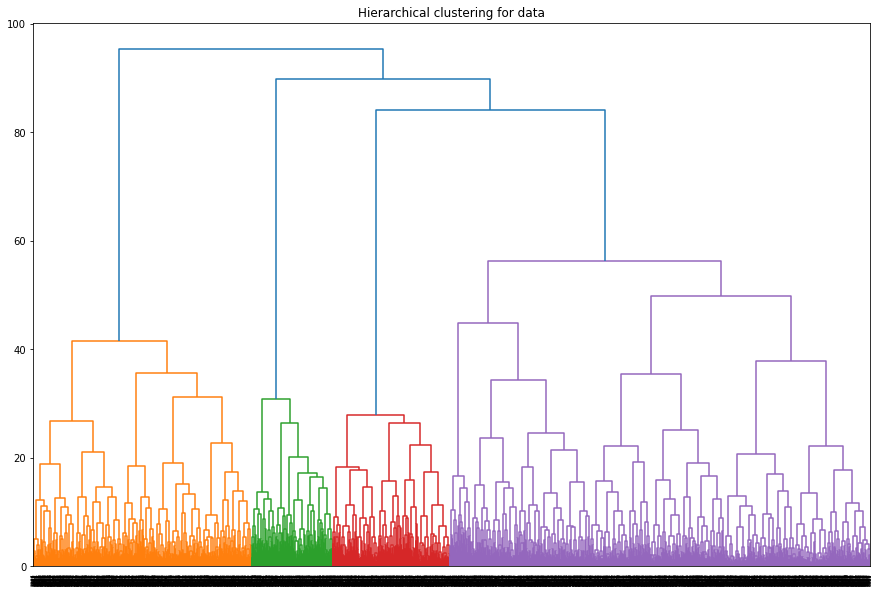

In [40]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for data')
#plt.xticks(rotation=45) 
plt.show() 

**Conclusion:** The dendrogram divided the data into 4 clusters.

**Train the clustering model with the K-means algorithm and predict customer clusters.**<a id='kmeans'></a>

In [41]:
sc = StandardScaler()
x_sc_ = sc.fit_transform(data) 

In [42]:
km = KMeans(n_clusters = 5, random_state = 0)
#predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc_) 
data['cluster_km'] = labels

**Look at the mean feature values for clusters. Does anything catch your eye?**<a id='mfv'></a>

In [43]:
data.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.475029,0.825784,0.457607,0.262485,1.000000,2.753775,0.383275,30.036005,151.136111,2.551684,4.641115,1.165759,1.164325,0.001161
1,0.548951,0.843823,0.368298,0.210956,0.998834,2.687646,0.438228,29.981352,161.303859,2.474359,4.615385,2.910943,2.918375,0.006993
2,0.504175,0.938413,0.768267,0.563674,1.000000,11.204593,0.560543,29.878914,162.665312,10.257829,4.711900,2.027649,2.021806,0.015658
3,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
4,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780


**Conclusion:** For the 4th group which is the most likely to leave we can see that they live further away from the location than others, they are the least likely to be affiliated with a partner organisation, the least likely to be signed up through friends' promo code, their contract period is the lowest, they are least likely to participate in group visits and they are also younger than others. 

**Plot distributions of features for the clusters. Do you notice anything?**<a id='distributions'></a>

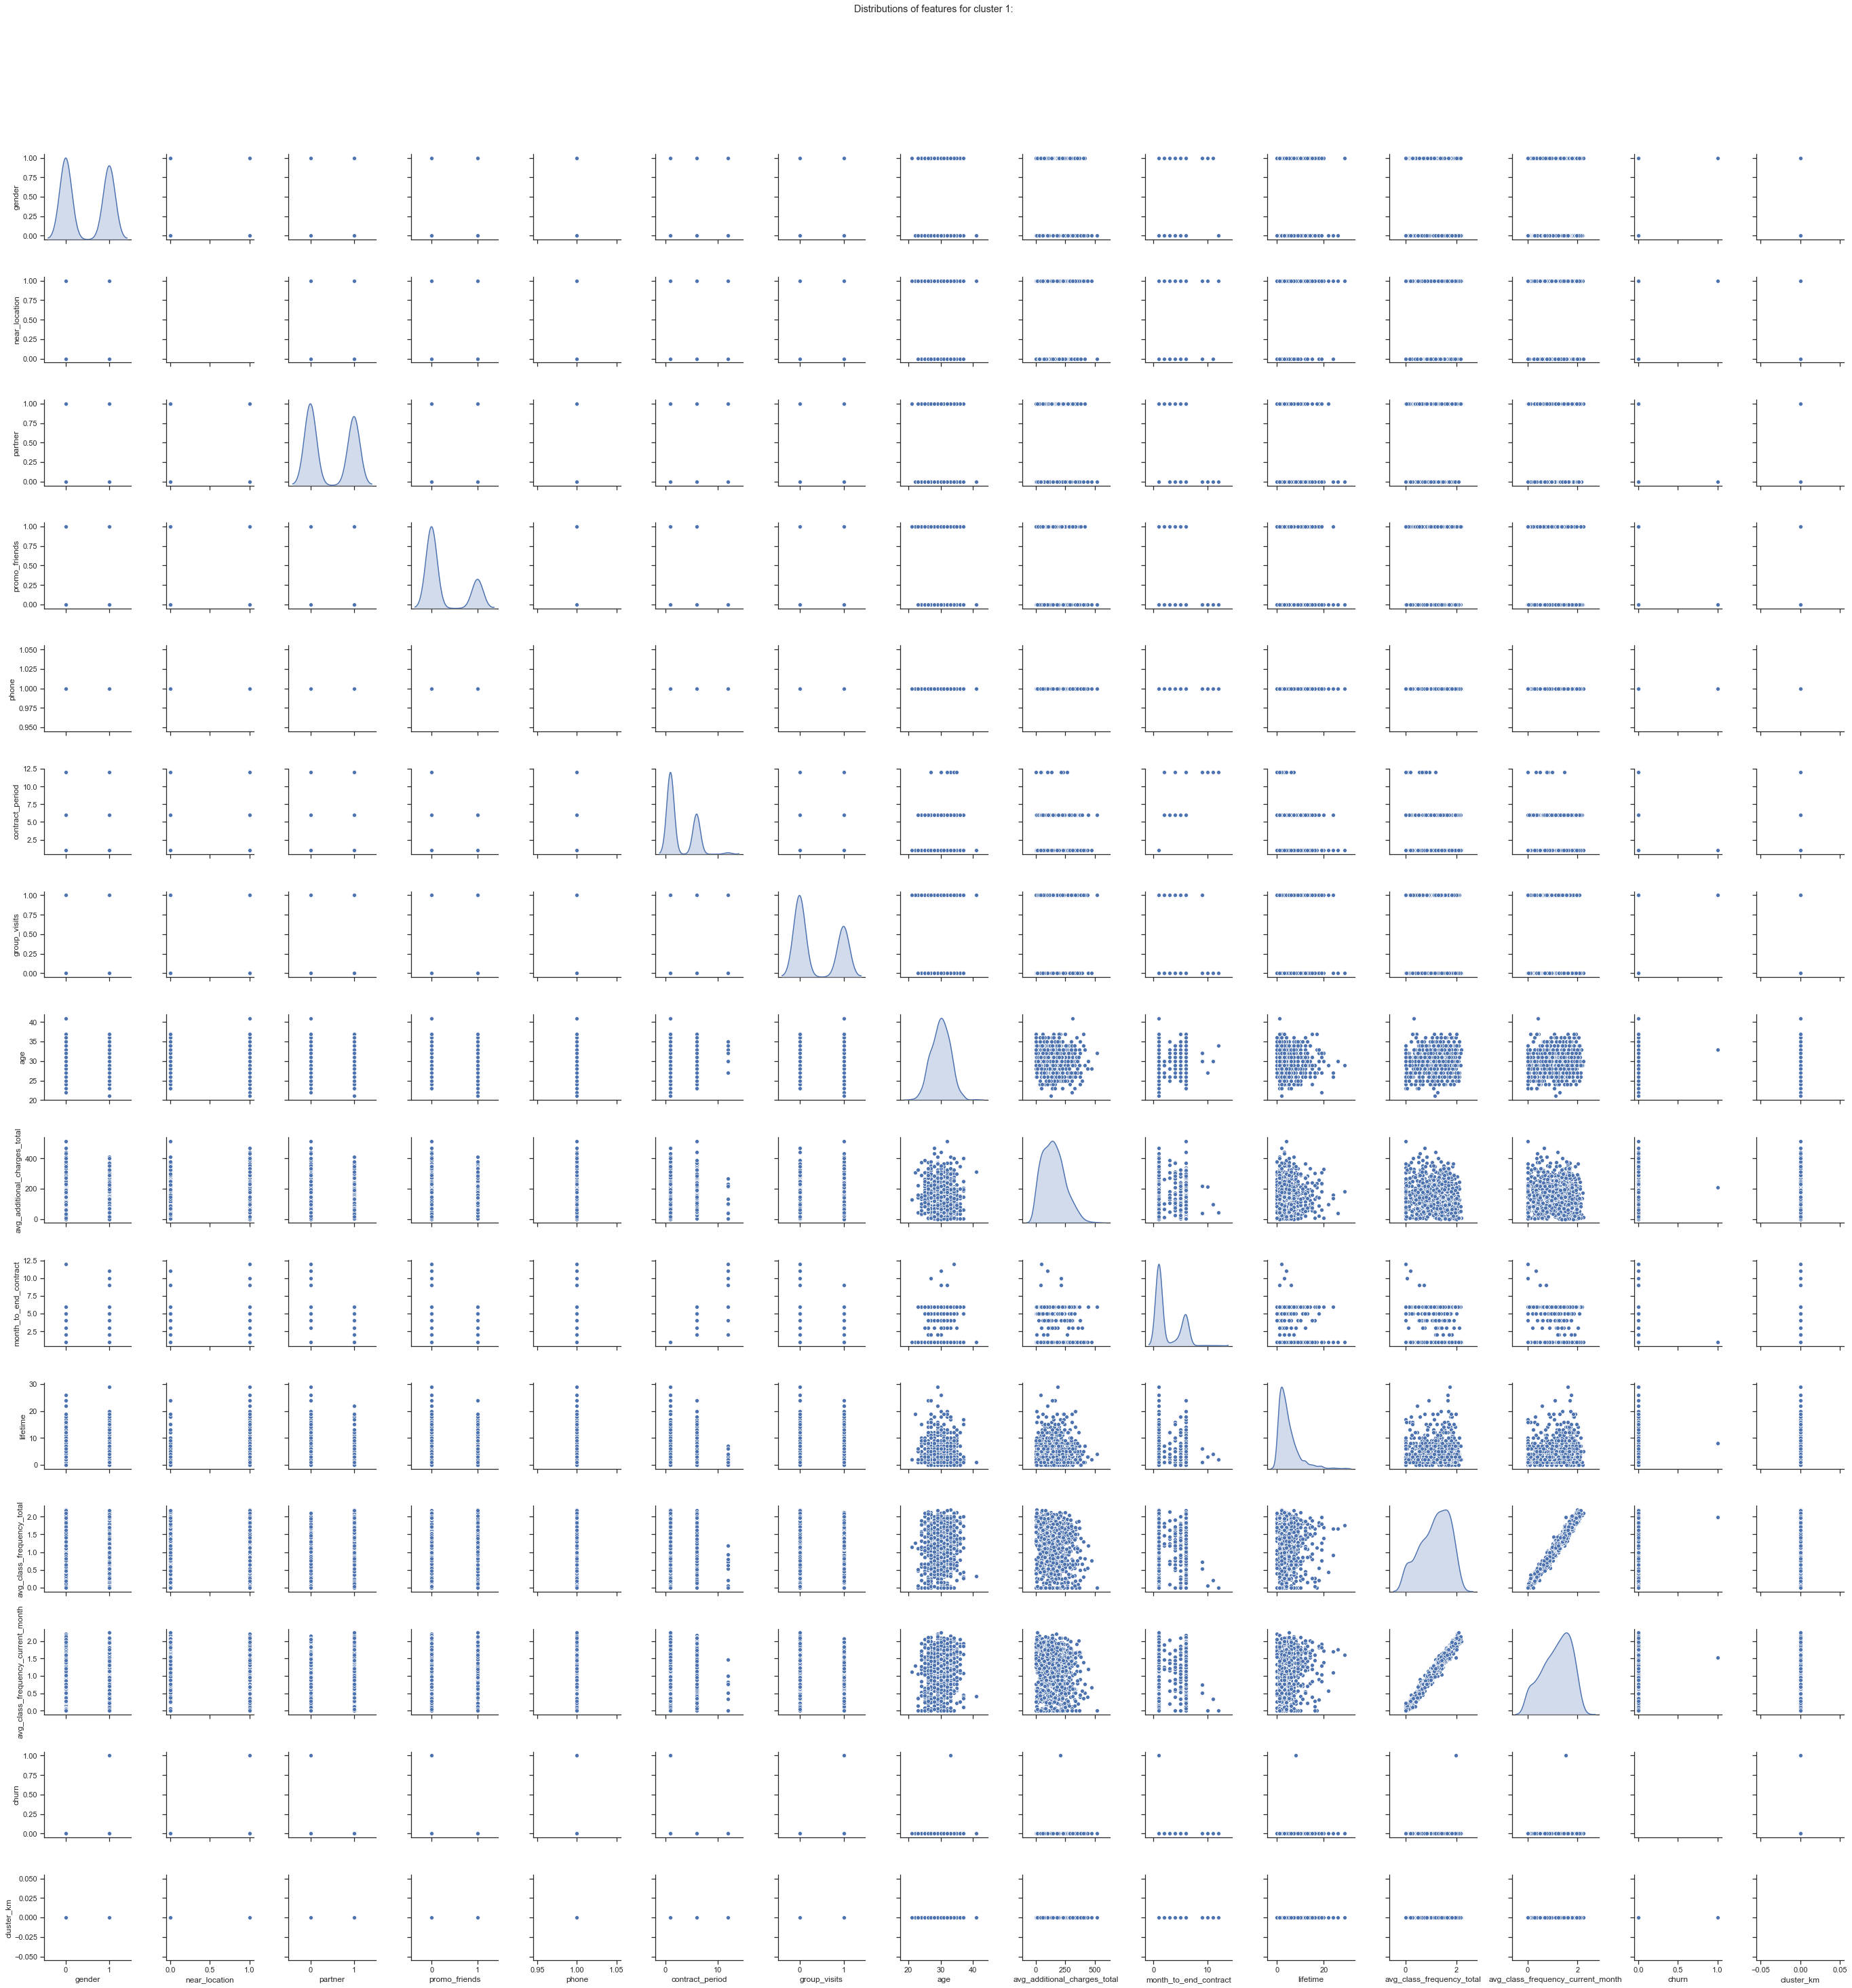

In [44]:
sns.set(style="ticks", color_codes=True)
g1 = sns.pairplot(data.query('cluster_km in "0"'), diag_kind = 'kde')
g1.fig.suptitle("Distributions of features for cluster 1:", y=1.08)
plt.show(sns)

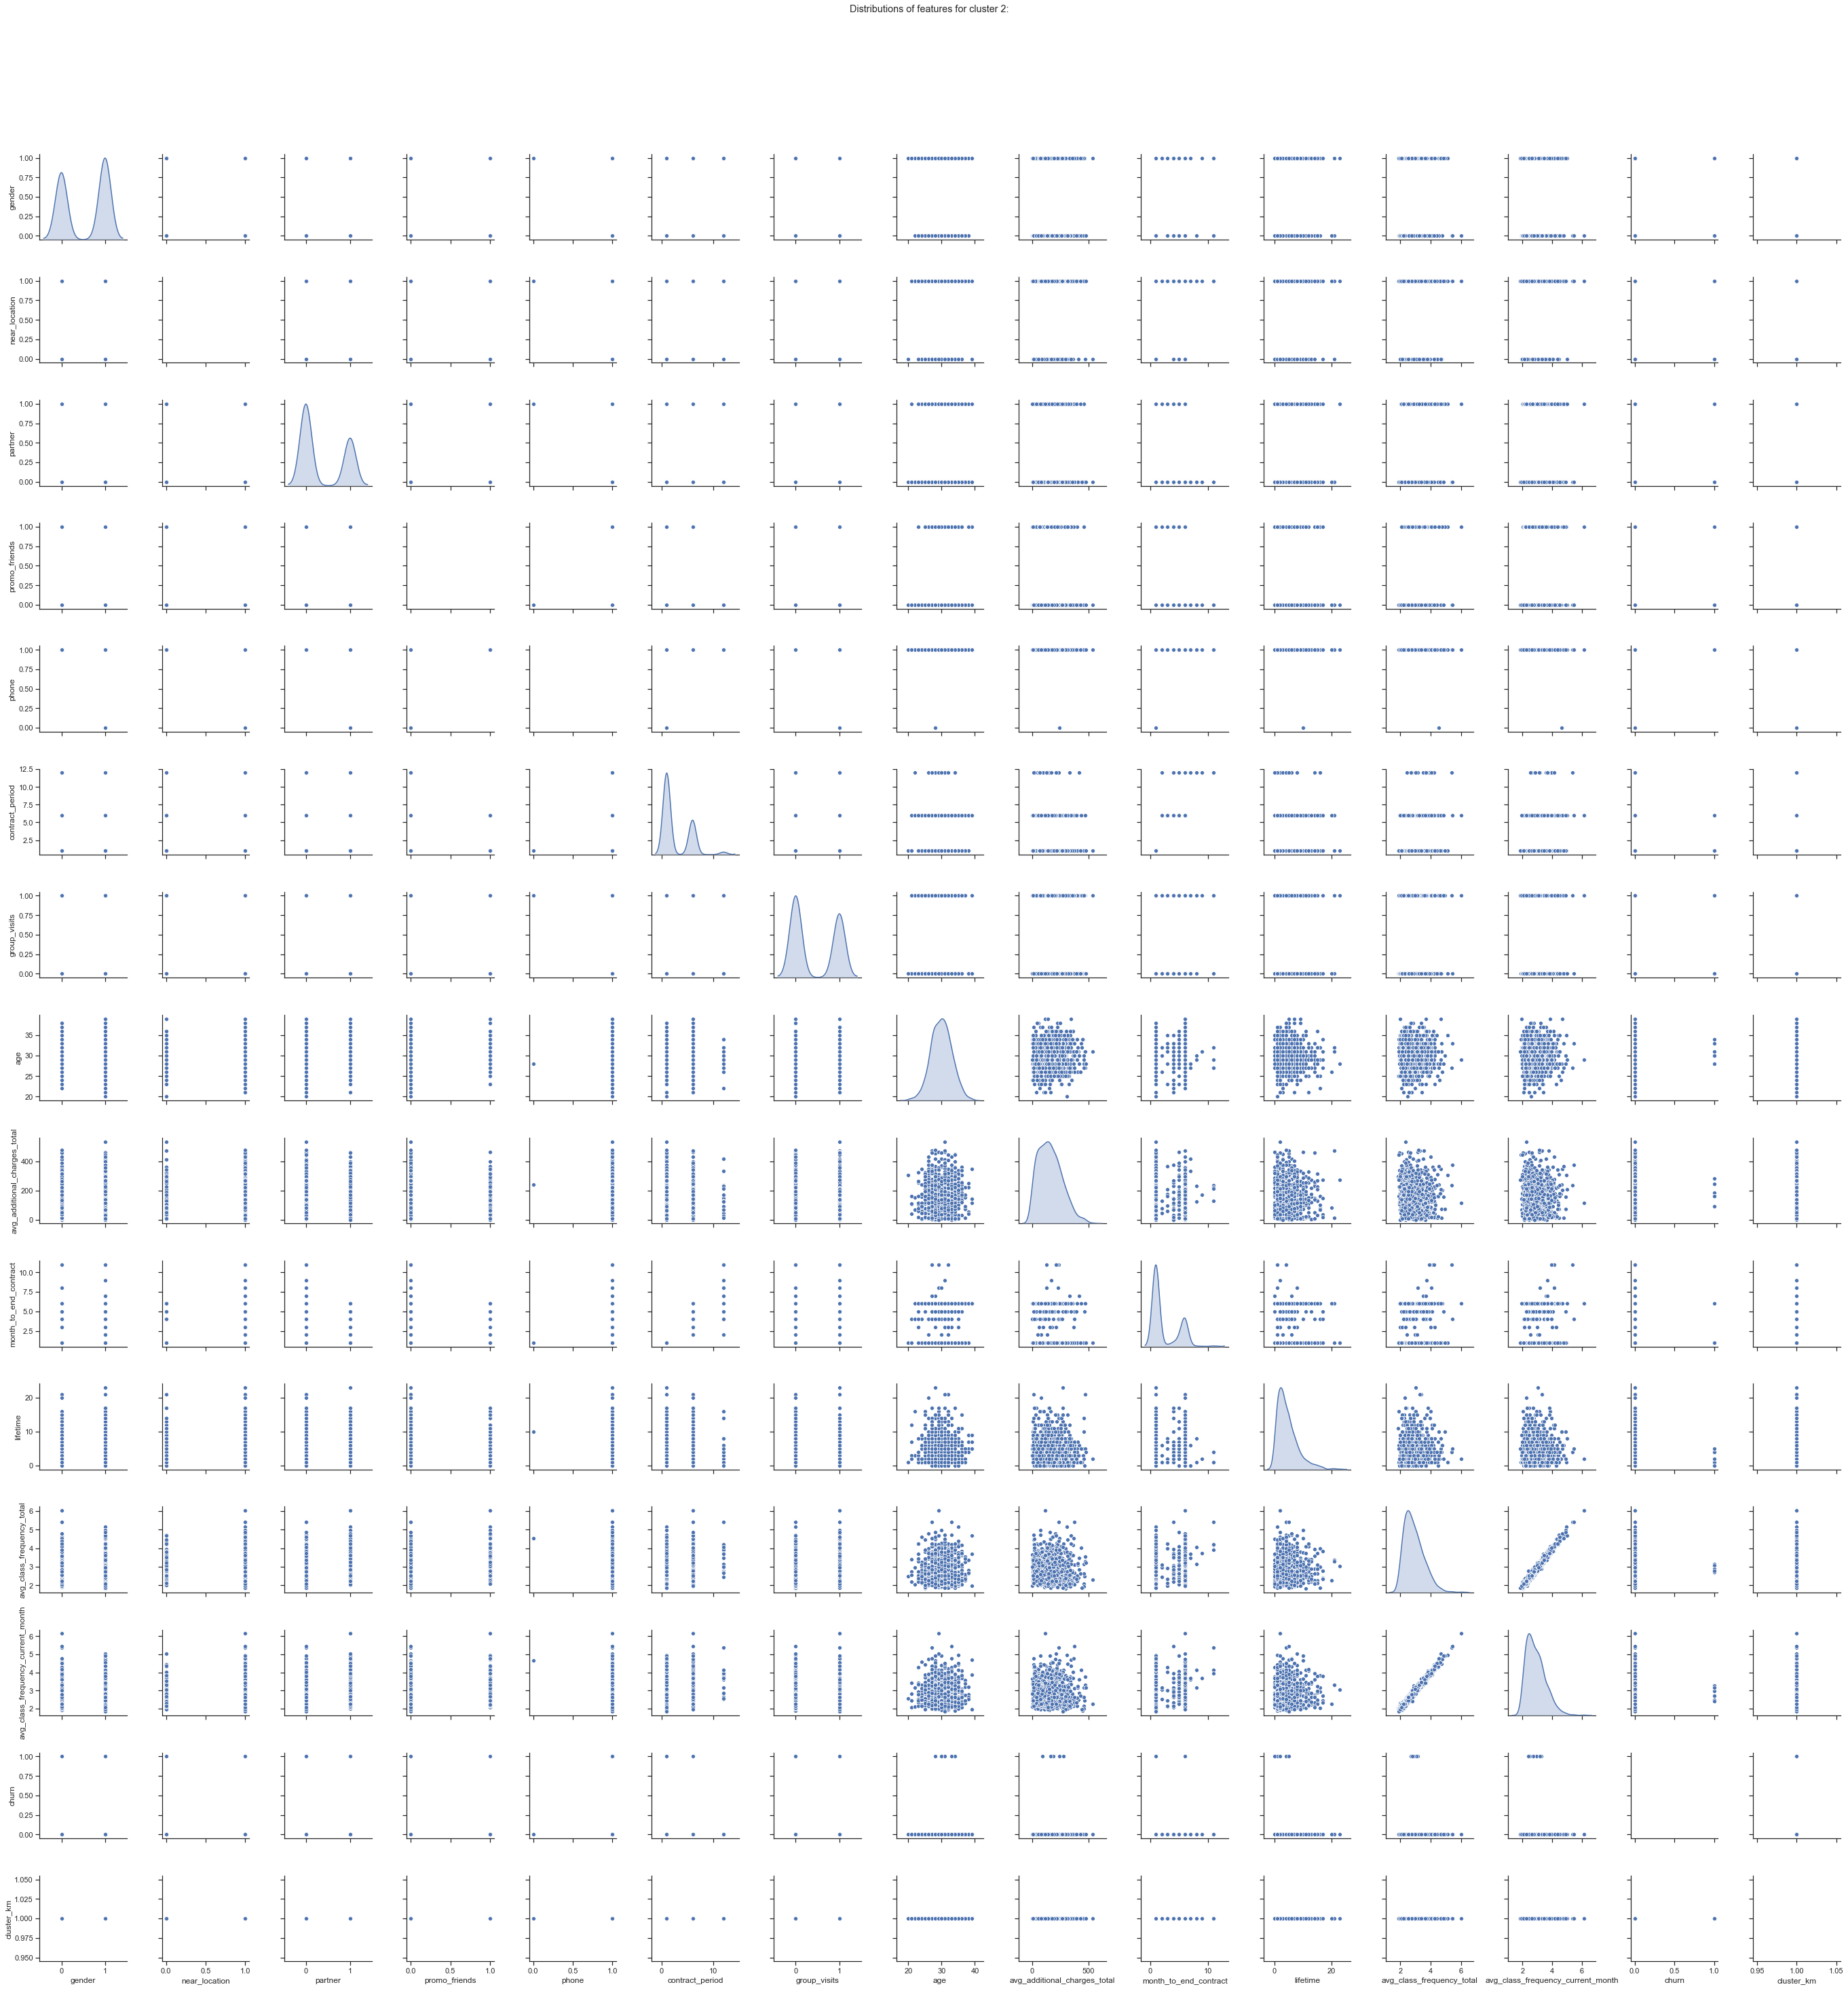

In [45]:
sns.set(style="ticks", color_codes=True)
g2 = sns.pairplot(data.query('cluster_km in "1"'), diag_kind = 'kde')
g2.fig.suptitle("Distributions of features for cluster 2:", y=1.08)
plt.show(sns)

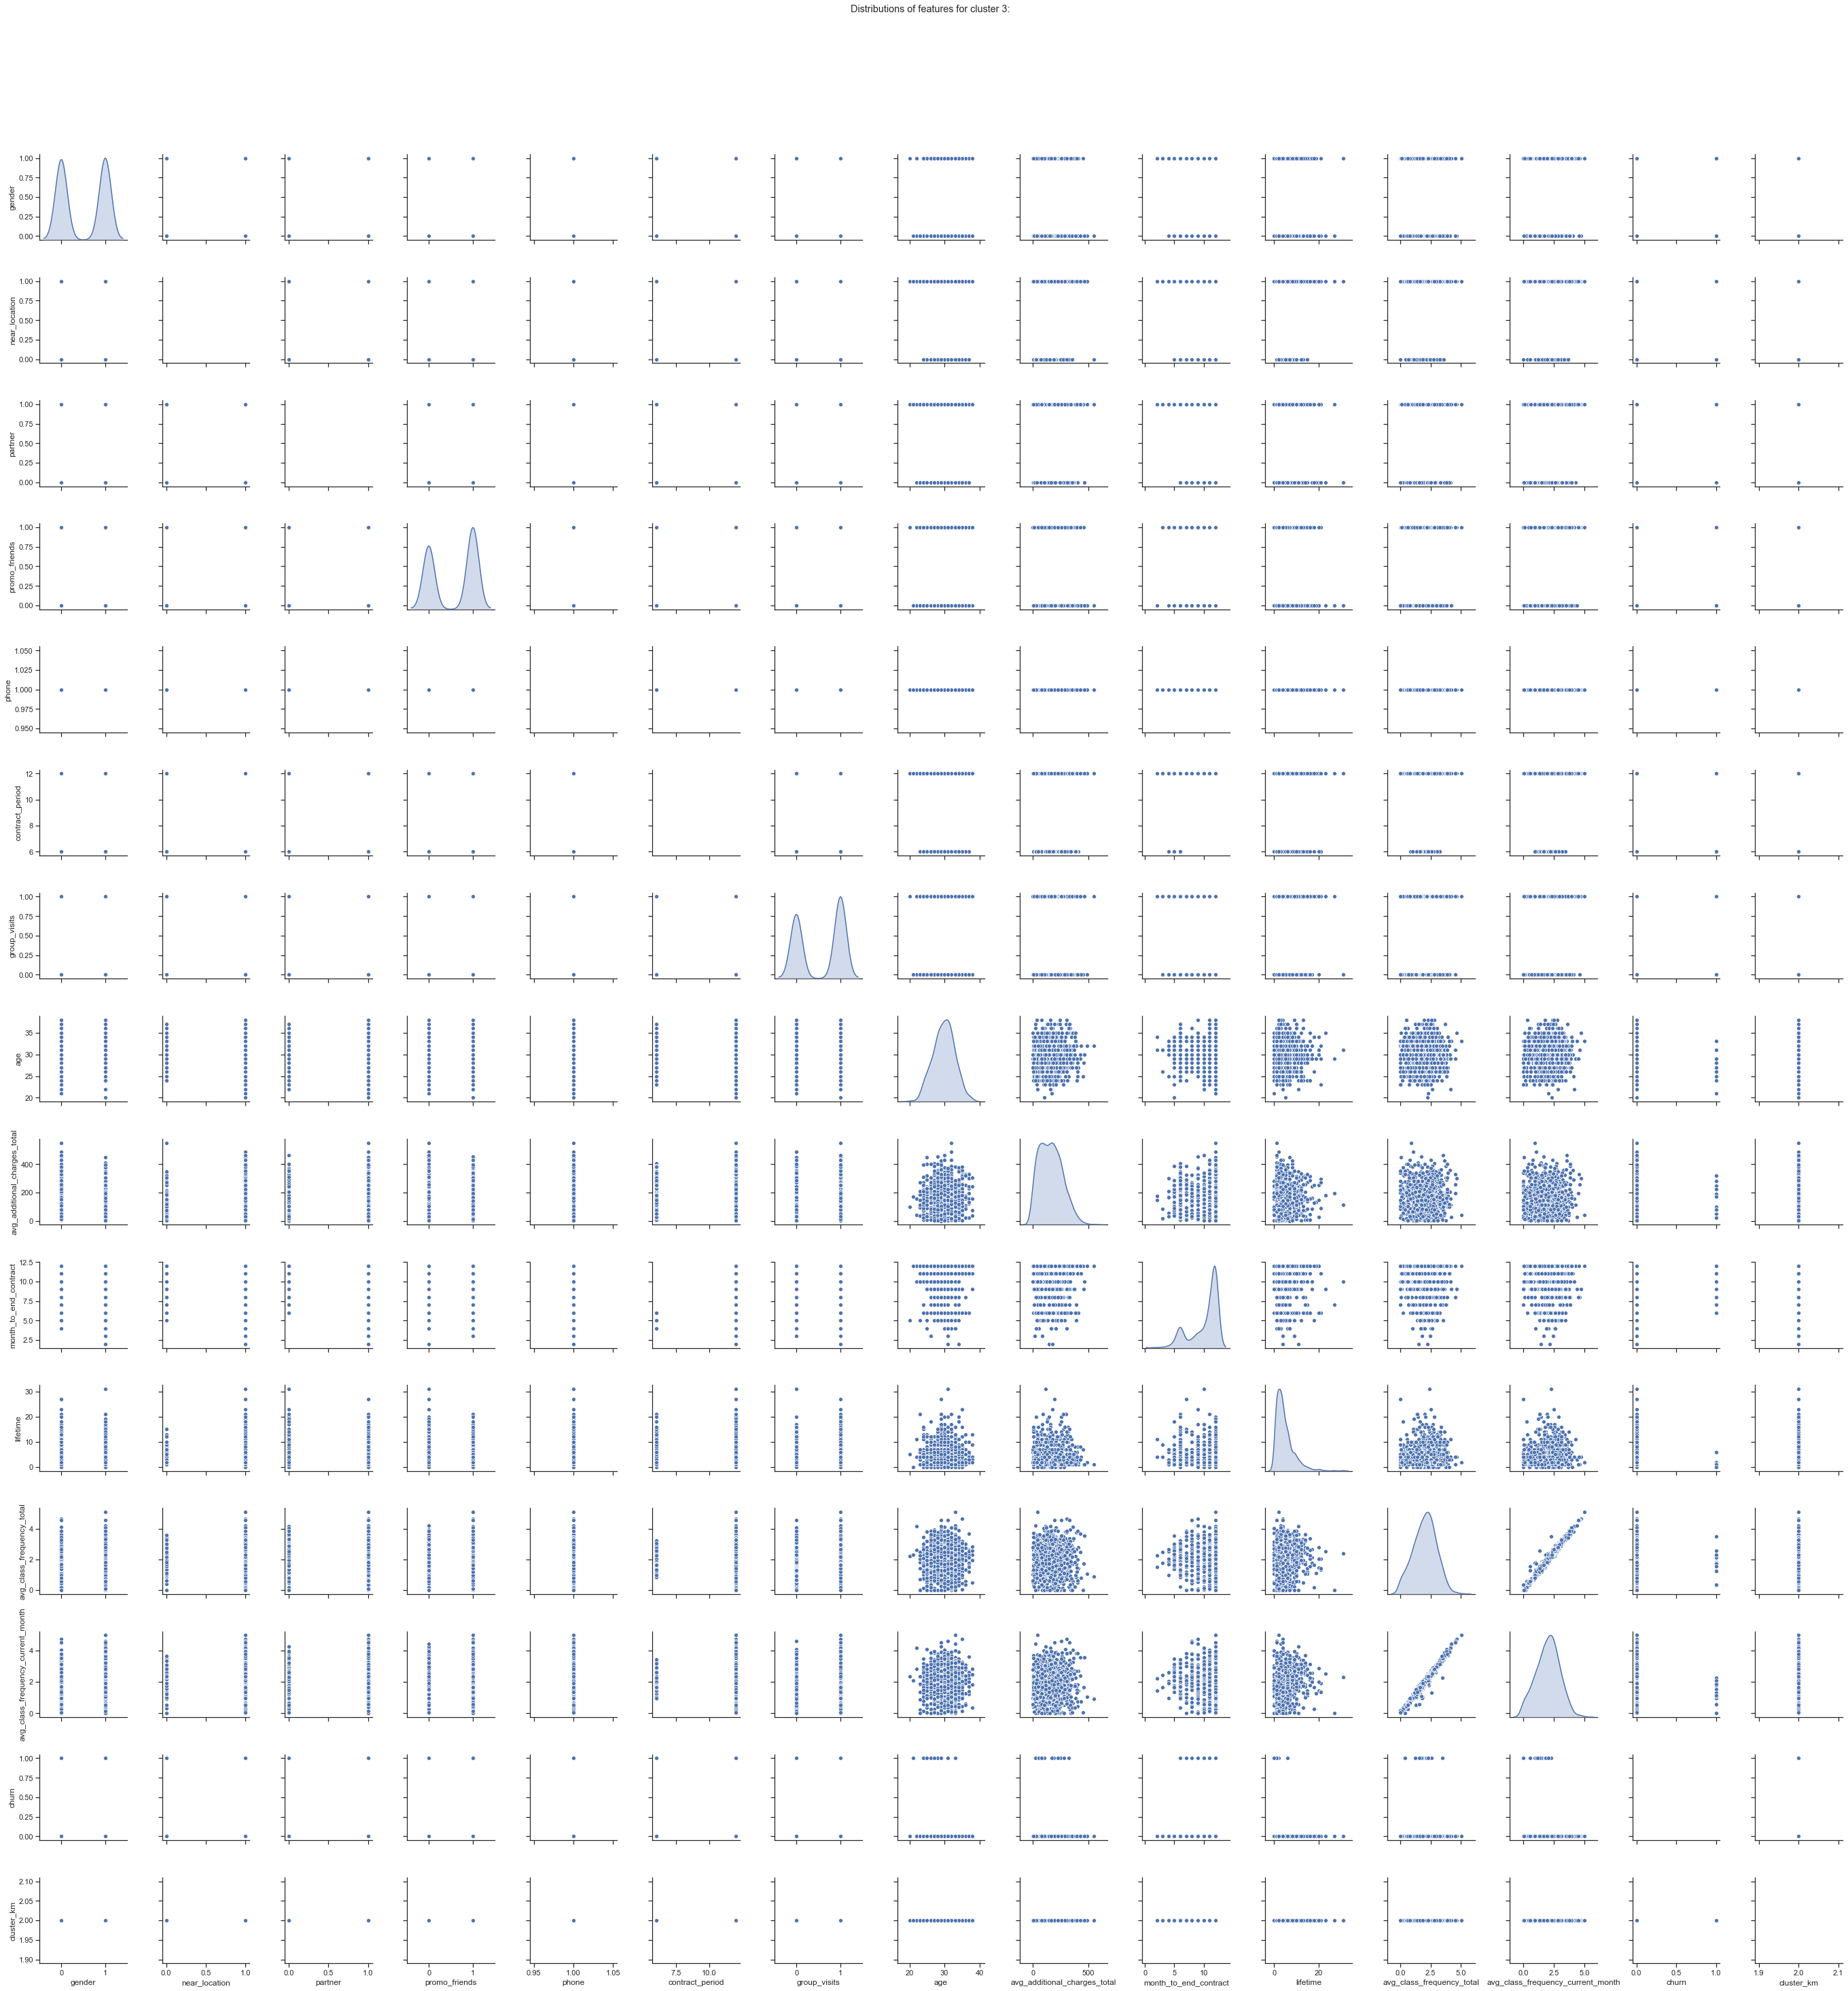

In [46]:
sns.set(style="ticks", color_codes=True)
g3 = sns.pairplot(data.query('cluster_km in "2"'), diag_kind = 'kde')
g3.fig.suptitle("Distributions of features for cluster 3:", y=1.08)
plt.show(sns)

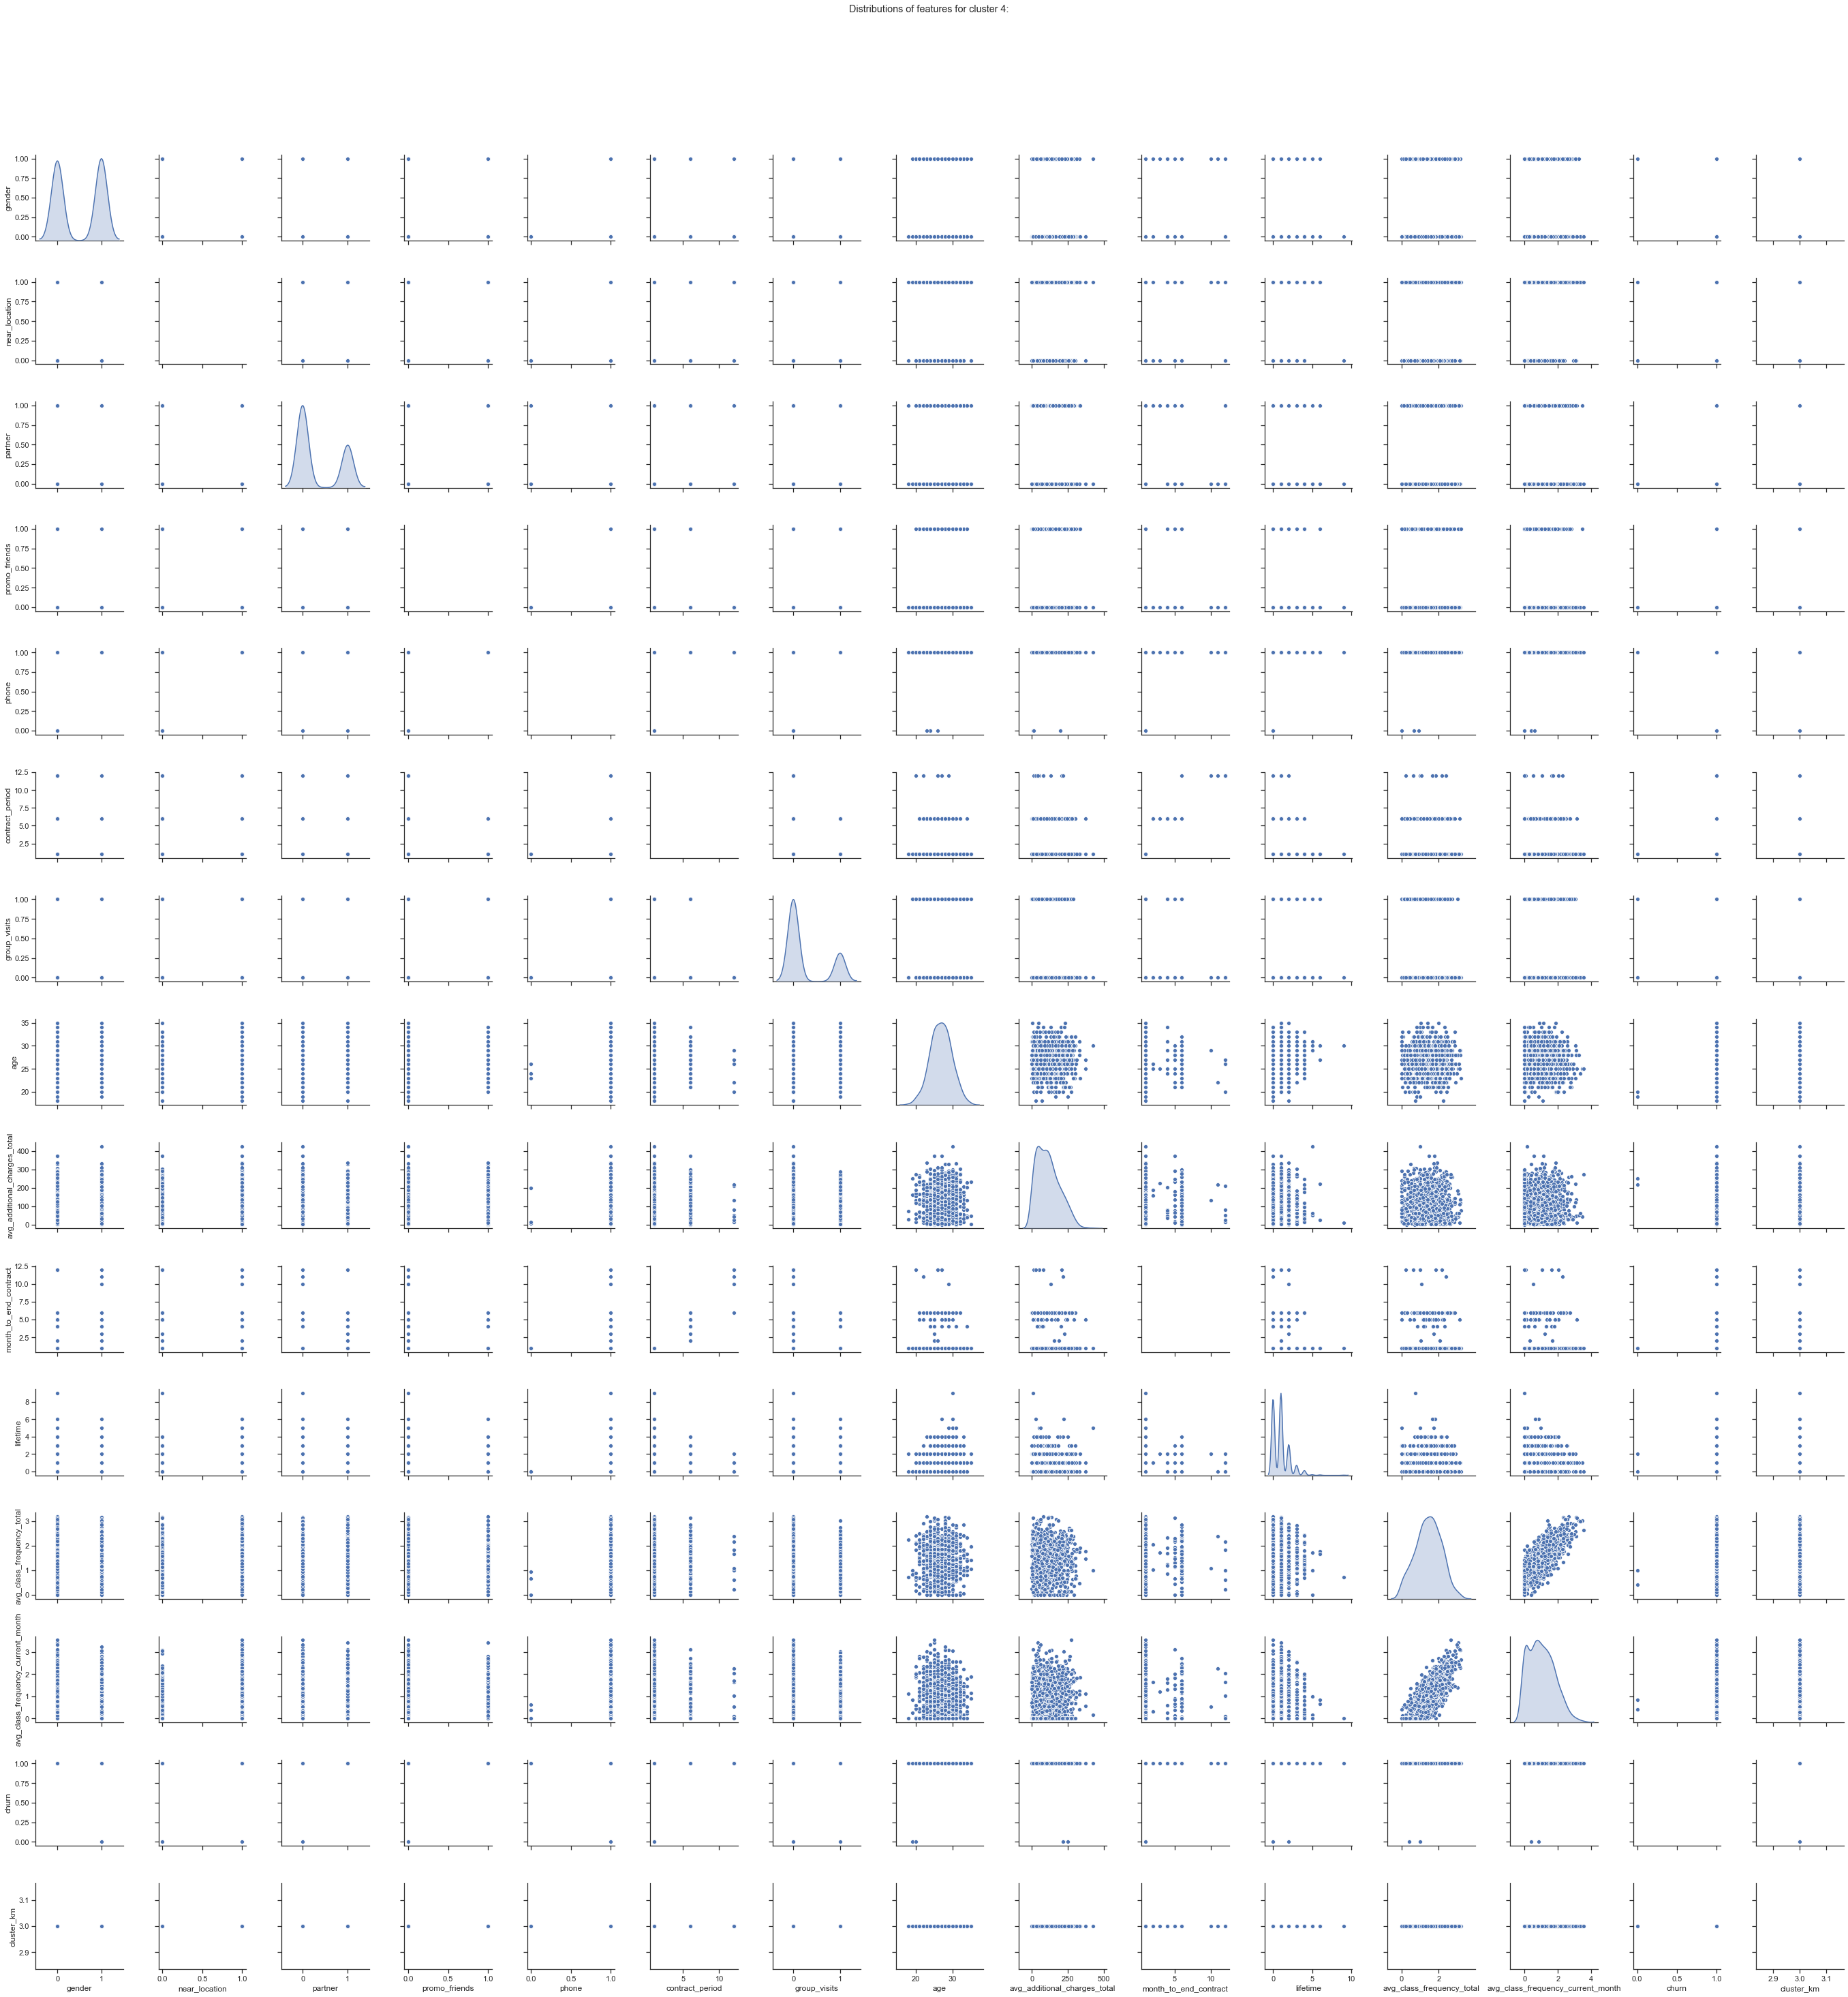

In [47]:
sns.set(style="ticks", color_codes=True)
g4 = sns.pairplot(data.query('cluster_km in "3"'), diag_kind = 'kde')
g4.fig.suptitle("Distributions of features for cluster 4:", y=1.08)
plt.show(sns)

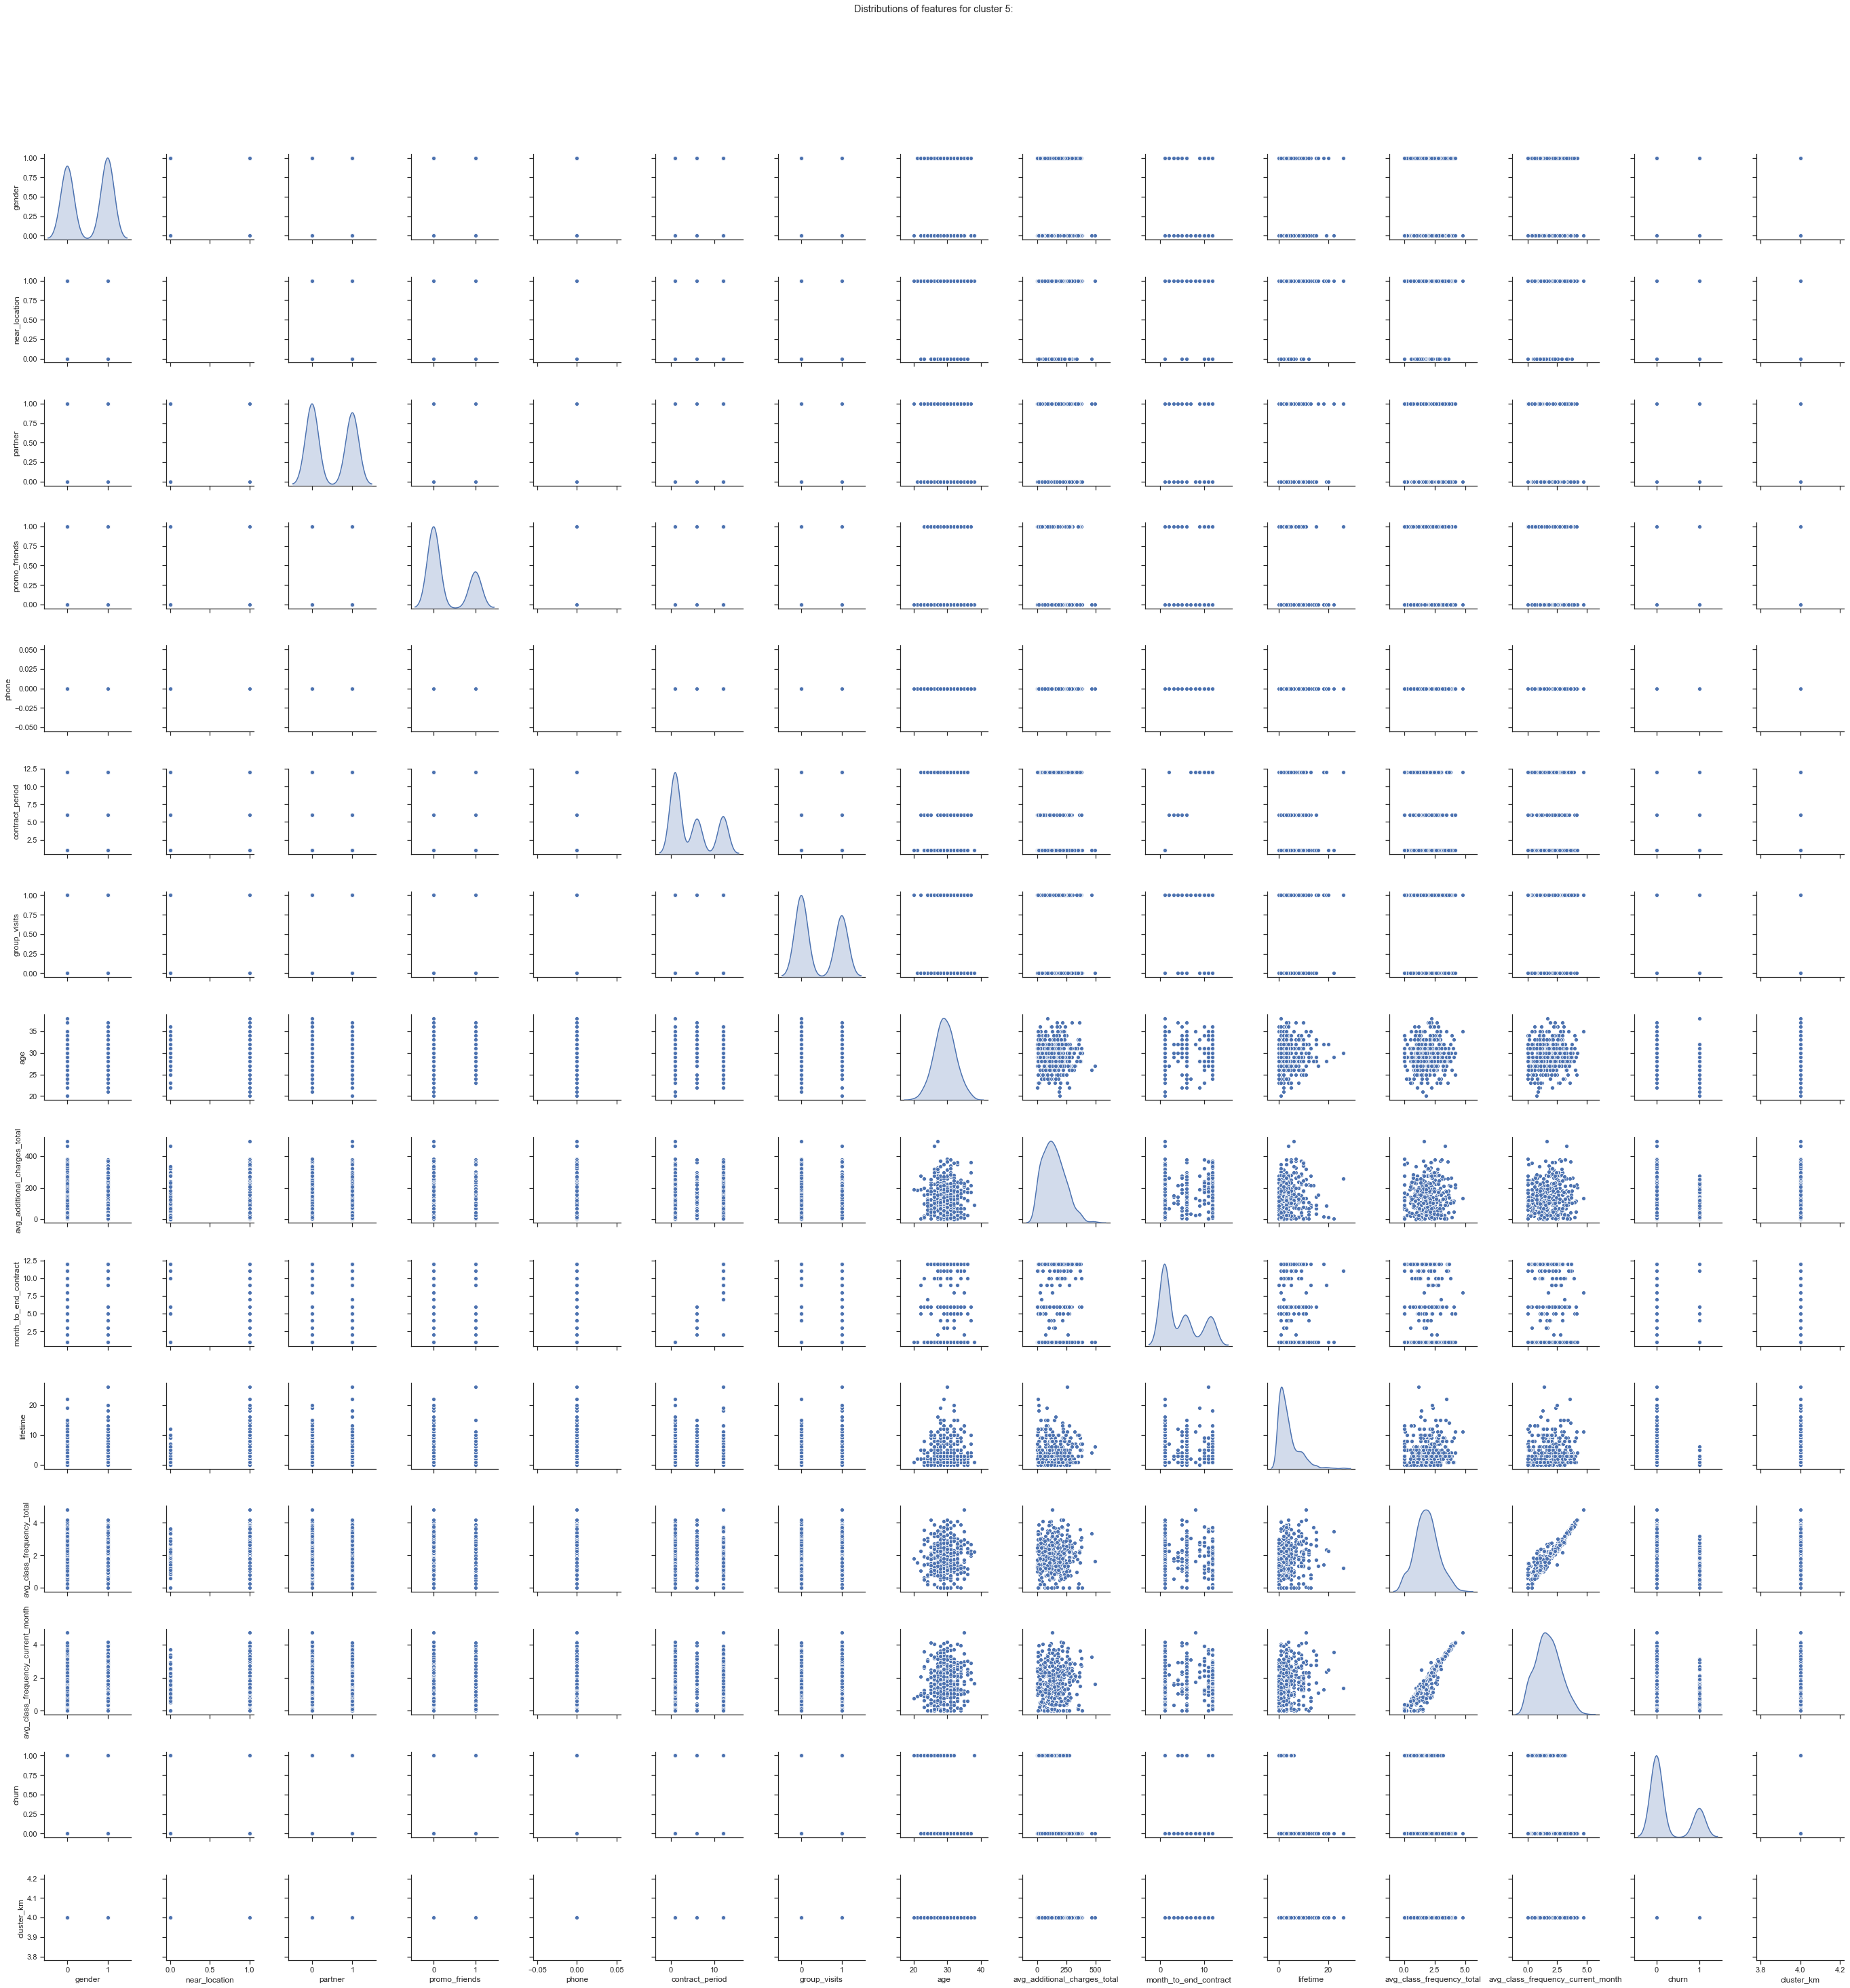

In [48]:
sns.set(style="ticks", color_codes=True)
g5 = sns.pairplot(data.query('cluster_km in "4"'), diag_kind = 'kde')
g5.fig.suptitle("Distributions of features for cluster 5:", y=1.08)
plt.show(sns)

**Conclusion:** After plotting the distribution of features for each cluster we can see that for those who stayed average class frequency total and for current month is more highly correlated as opposed to those who left. 

**Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?**<a id='churnrate'></a>

In [49]:
churn_rate_median = data.groupby(['cluster_km'])['churn'].median().reset_index()
churn_rate_median.sort_values(by='churn', ascending = False)

,cluster_km,churn
3,3,1
0,0,0
1,1,0
2,2,0
4,4,0


In [50]:
churn_rate_mean = data.groupby(['cluster_km'])['churn'].mean().reset_index()
churn_rate_mean.sort_values(by='churn', ascending = False)

,cluster_km,churn
3,3,0.997875
4,4,0.261780
2,2,0.015658
1,1,0.006993
0,0,0.001161


**Conclusion:** Groups with indexes 0, 1 and 2 are very loyal. Group with index 4 is relatively loyal but at a low risk of leaving. Group with index 3 is undeniably prone to leaving. 

**Overall conclusion for Step 4:** Using K-Means we divided the data into 5 clusters and were able to look more closely at the characteristics of members who left and of those who stayed. Location, promo codes from friends and time before contract expiration seem to influence the decision to leave. 

[**Back to list of instructions** ](#contents)

**Step 5**. Come up with conclusions and basic recommendations on working with customers.<a id='conclusions'></a>

- Give discounts for members who live further away from the gym.
- Advertise group activities with people of the same age group for reduced price.
- Encourage and reward inviting friends which may be lacking for groups not affiliated with partner organisations.
- Give discounts for signing up for a longer contract.

**Overall conclusion:** Those who left **live slightly further away** from the location. They are **less likely to be an employee of a partner company**. They are **less likely** to have signed up through a **promo code from a friend**. They have equal likelihood of having provided their phone number. Their **contract period** is on average around **3 times shorter** than for those who stayed. Those who left are much **less likely to participate in group sessions**. Those who left are slightly **younger** than those who stayed. They had way **less time left till the end of their contract** as opposed to those who stayed. They visited once a week on average as opposed to two times a week on average for those who stayed.

The distribution for gender and locations looks similar for both groups. Those who left are slightly less likely to be from a partner organisation. For those who stayed the distribution of contract period left is more balanced with a lot of people having 6 or 12 months left. Those who churned were more likely to have less than 2 months of contract left. The age is distributed normally for both groups. The histogram on additional charges looks similar for both groups. Those who left have been a member on average for a smaller period of time than those who stayed. Average class attendance frequency seems compatible for both groups in total, but average class frequency for the current month is much lower for those tho eventually left.

The **features** that have the strongest correlation with the target variable: **contract period, age, month to end contract, lifetime, average class frequency current month**.
The features that strongly correlate with each other: avg class frequency total and avg class frequency current month, contract period and month to end contract have correlation higher than 0.8.

We trained the model with two methods - logistic Regression and Random Forest Classifier. Both with and without the threshold of 0.5, **Logistic Regression showed better result** in terms of accuracy, precision, recall and F1.

The dendrogram divided the data into **4 clusters**.

For the **forth group which is the most likely to leave** we can see that they live further away from the location than others, they are the least likely to be affiliated with a partner organisation, the least likely to be signed up through friends' promo code, their contract period is the lowest, they are least likely to participate in group visits and they are also younger than others.

After plotting the distribution of features for each cluster we can see that for those who stayed average class frequency total and for current month is more highly correlated as opposed to those who left.

Groups 1,2 and 3 are very loyal. Group 5 is relatively loyal but at a low risk of leaving. Group 4 is very much prone to leaving.

Using K-Means we divided the data into 5 clusters and were able to look more closely at the characteristics of members who left and of those who stayed. Location, promo codes from friends and time before contract expiration seem to influence the decision to leave.

Basic recommendations on working with customers.

**Give discounts for members who live further away from the gym.**<br>
**Advertise group activities with people of the same age group for reduced price.**<br>
**Encourage and reward inviting friends which may be lacking for groups not affiliated with partner organisations.**<br>
**Give discounts for signing up for a longer contract.**

[**Back to list of instructions** ](#contents)

Thank you for checking my work. 